## Observations and Insights 

1. With a correlation of 0.95 there is a positive correlation between average tumor volume and weight of subjected mice
2. Campomulin and Ramicane had the most data points out of all drugs present in the study
3. Capomulin and Ramicane were the most successful drugs in reducing the size of the tumors.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_summary = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
mouse_summary.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
no_of_mice= len(mouse_summary.index)
no_of_mice

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice=mouse_summary[mouse_summary.duplicated(["Mouse ID","Timepoint"],keep=False)]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouseid = mouse_summary[mouse_summary.duplicated(["Mouse ID"],keep=False)]
duplicate_mouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_mouseid = mouse_summary.drop_duplicates(subset=["Mouse ID"],keep=False)
duplicate_mouseid

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
594,b447,Ceftamin,Male,2,30,0,45.0,0
752,d133,Zoniferol,Male,5,30,0,45.0,0
851,f932,Ketapril,Male,15,29,0,45.0,0
938,h428,Ketapril,Female,1,27,0,45.0,0
1163,l872,Placebo,Male,19,30,0,45.0,0
1216,n482,Propriva,Female,4,29,0,45.0,0
1315,o848,Stelasyn,Female,14,27,0,45.0,0
1551,t573,Ceftamin,Female,15,27,0,45.0,0
1583,u153,Ceftamin,Female,11,25,0,45.0,0
1599,v199,Naftisol,Female,17,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
no_of_miceclean= duplicate_mouseid["Mouse ID"].value_counts()
#no_of_miceclean

mice_clean = duplicate_mouseid.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_clean

Drug Regimen
Ceftamin     4
Ketapril     2
Naftisol     2
Placebo      1
Propriva     1
Stelasyn     1
Zoniferol    1
Name: Mouse ID, dtype: int64

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#Identify the diferrent Drug Regimen along with the total tumor volume for each using .groupby
regimen_grouped=mouse_summary.groupby(["Drug Regimen"])

#create computation for the mean of each regimen
avg_volume = regimen_grouped["Tumor Volume (mm3)"].mean()

#create computation for the median of each regimen
median_volume = regimen_grouped["Tumor Volume (mm3)"].median()

#create computation for the variance of each regimen
var_volume = regimen_grouped["Tumor Volume (mm3)"].var()

#create computation for the standard deviation of each regimen
std_volume = regimen_grouped["Tumor Volume (mm3)"].std()

#create computation for the standard error of each regimen
sem_volume = regimen_grouped["Tumor Volume (mm3)"].sem()





In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_stats = pd.DataFrame({"Mean":avg_volume,"Median":median_volume,"Variance":var_volume,"Standard Deviation":std_volume,"SEM":sem_volume})
summary_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Groupby drug regimen with .count and mouse id to determine the datapoints

regimen_data_points = mouse_summary.groupby(["Drug Regimen"]).count()["Mouse ID"]
regimen_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

## Bar and Pie Charts

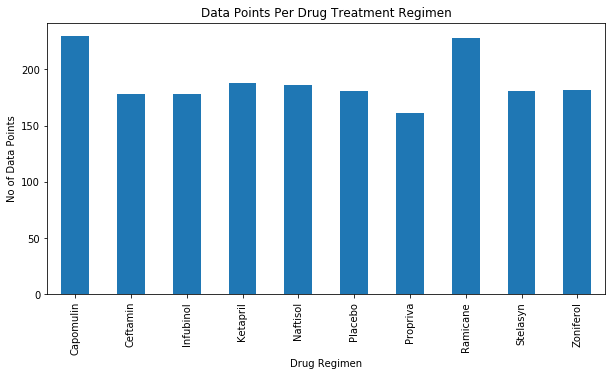

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_data_points.plot(kind="bar" , figsize=(10,5))

#Set the title and labels
plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No of Data Points")

#Saving the chart 
plt.savefig('C:/Project/Matplotlib-Challenge/Images/Bargraph1.png')
#Show chart and set layout 
plt.show()
plt.tight_layout()


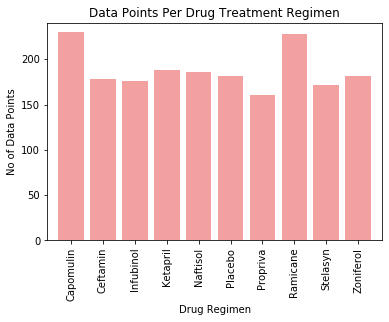

In [11]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#Create an array with the datapoints
users = [230, 178, 176, 188, 186, 181, 161, 228, 171, 182]

#Set the x_axis to be the amount of the Data Regimen
x_axis = np.arange(len(regimen_data_points))

plt.bar(x_axis, users, color='lightcoral', alpha=0.75, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(users)+10)

plt.title("Data Points Per Drug Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("No of Data Points")
plt.savefig('C:/Project/Matplotlib-Challenge/Images/Bargraph2.png')
plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#Group by "Mouse ID" and "Sex" to find the unique number of male vs female
groupby_gender = mouse_summary.groupby(["Mouse ID" ,"Sex" ])
groupby_gender

mouse_gender_df=pd.DataFrame(groupby_gender.size())

#Create the dataframe with total count of Female and Male mice
mouse_gender = pd.DataFrame(mouse_gender_df.groupby(["Sex"]).count())
mouse_gender.columns = ["Total Count"]

#Create and format the percentage of female vs male
mouse_gender["Percentage of Sex"] =(100 *(mouse_gender["Total Count"]/mouse_gender["Total Count"].sum()))

#Format the "Percentage of Sex" column
mouse_gender["Percentage of Sex"] = mouse_gender["Percentage of Sex"]

#Gender_df
mouse_gender


,Total Count,Percentage of Sex
Sex,,
Female,124,49.799197
Male,125,50.200803


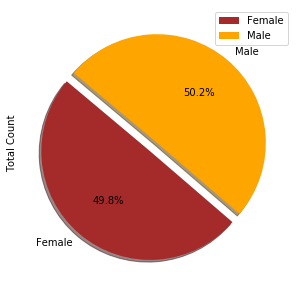

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

colors = ["brown" ,"orange"]
explode =(0.1,0)
plot = mouse_gender.plot.pie(y="Total Count",figsize=(5,5),colors=colors,startangle=140,explode=explode,shadow=True,autopct="%1.1f%%")
plt.savefig('C:/Project/Matplotlib-Challenge/Images/Piechart1.png')
plt.show()

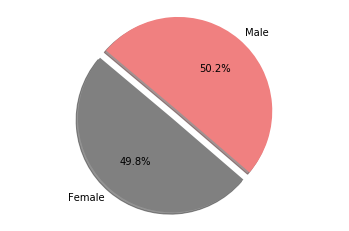

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels for the sections of the pie
labels = ["Female","Male"]

#List the values of each section of the pie chart
sizes = [49.799197,50.200803]

#Set colors for each section of the pie
colors = ['grey', 'lightcoral']

#Determoine which section of the circle to detach
explode = (0.1, 0)

#Create the pie chart based upon the values 
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

#Set equal axis
plt.axis("equal")

#Save to file
plt.savefig('C:/Project/Matplotlib-Challenge/Images/Piechart2.png')

plt.show()

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimen Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Extract the top 4 regimen from the data frame in order to perform IQR test on each
best_regimen = mouse_summary[mouse_summary["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
best_regimen = best_regimen.sort_values(["Timepoint"],ascending=True)
best_regimen

best_regimen_data = best_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_regimen_data.head() 

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


## Quartiles, Outliers and Boxplots

In [16]:
#METHOD 1

#Extracting the top 4 regimen from the data frame in order to perform IQR test on each
cap_df = mouse_summary.loc[mouse_summary["Drug Regimen"] == "Capomulin",:]
ram_df = mouse_summary.loc[mouse_summary["Drug Regimen"] == "Ramicane", :]
inf_df = mouse_summary.loc[mouse_summary["Drug Regimen"] == "Infubinol", :]
ceft_df = mouse_summary.loc[mouse_summary["Drug Regimen"] == "Ceftamin", :]
cap_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [17]:
caplast = cap_df.groupby('Mouse ID').max()['Timepoint']
caplastvol = pd.DataFrame(caplast)
caplastmerge = pd.merge(caplastvol, mouse_summary, on=("Mouse ID","Timepoint"),how="left")
caplastmerge.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumors = caplastmerge["Tumor Volume (mm3)"]

quartiles = tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

#print(f"The lower quartile of temperatures is: {lowerq}")
#print(f"The upper quartile of temperatures is: {upperq}")
#print(f"The interquartile range of temperatures is: {iqr}")
#print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Capomulin potential outliers could be values below {lower_bound} and above {upper_bound} could be outliers.")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.


In [19]:
ramlast = ram_df.groupby('Mouse ID').max()['Timepoint']
ramlastvol = pd.DataFrame(ramlast)
ramlastmerge = pd.merge(ramlastvol,mouse_summary, on=("Mouse ID","Timepoint"),how="left")
ramlastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [20]:
#Ramicane
tumors2 = ramlastmerge["Tumor Volume (mm3)"]

quartiles2 = tumors2.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2

lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)
print(f"Ramicane potential outliers could be values below {lower_bound2} and above {upper_bound2} could be outliers.")

Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.


In [21]:
inflast = inf_df.groupby('Mouse ID').max()['Timepoint']
inflastvol = pd.DataFrame(inflast)
inflastmerge = pd.merge(inflastvol, mouse_summary, on=("Mouse ID","Timepoint"),how="left")
inflastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [22]:
#Infubinol
tumors3 = inflastmerge["Tumor Volume (mm3)"]

quartiles3 = tumors3.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3

lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)
print(f"Infubinol potential outliers could be values below {lower_bound3} and above {upper_bound3} could be outliers.")

Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.


In [23]:
ceftlast = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftlastvol = pd.DataFrame(ceftlast)
ceftlastmerge = pd.merge(ceftlastvol, mouse_summary, on=("Mouse ID","Timepoint"),how="left")
ceftlastmerge.head(10)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [24]:
#Ceftamin
tumors4 = ceftlastmerge["Tumor Volume (mm3)"]

quartiles4 = tumors4.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4

lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)
print(f"Ceftamin potential outliers could be values below {lower_bound4} and above {upper_bound4} could be outliers.")

Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


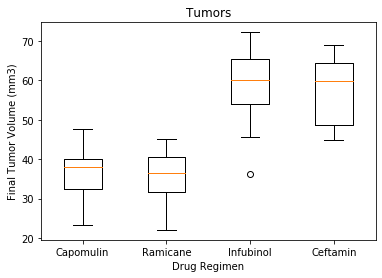

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_to_plot = [tumors, tumors2, tumors3, tumors4]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(data_to_plot, labels=["Capomulin","Ramicane","Infubinol","Ceftamin",])

plt.savefig('C:/Project/Matplotlib-Challenge/Images/Boxplot.png')
plt.show()

In [26]:
#METHOD 2

# Calculate the final tumor volume of each mouse across four of the most promising treatment regimen Capomulin, Ramicane, Infubinol, and Ceftamin. Calculate the IQR and quantitatively determine if there are any potential outliers. 

#Extracting the top 4 regimen from the data frame in order to perform IQR test on each
best_regimen = mouse_summary[mouse_summary["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])]
best_regimen = best_regimen.sort_values(["Timepoint"],ascending=True)
best_regimen

best_regimen_data = best_regimen[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
best_regimen_data.head() 

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,0,45.0
1391,Infubinol,q132,0,45.0
195,Capomulin,i738,0,45.0
205,Ramicane,a520,0,45.0
1370,Ceftamin,p438,0,45.0


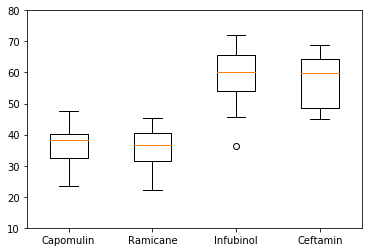

In [27]:
#Group data by Drug Regimen and Mouse ID to capture Last Tumor Measurement

best_regimen_sort = best_regimen_data.groupby(["Drug Regimen","Mouse ID"]).last()["Tumor Volume (mm3)"]
best_regimen_sort.head()

# Turn retrieved data into dataframe to easily manipulate
best_regimen_df = best_regimen_sort.to_frame()
best_regimen_df

#Create a list to use as labels and datafram
top_4 = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

final_df = best_regimen_df.reset_index()

tumor_lists = final_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].apply(list)

tumor_list_df = pd.DataFrame(tumor_lists)

tumor_list_df = tumor_list_df.reindex(top_4)

tumor_vols = [vol for vol in tumor_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_vols, labels=top_4)
plt.ylim(10, 80)
plt.show()



## Line and Scatter Plots

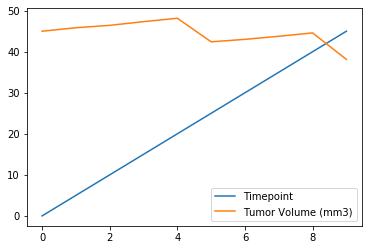

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
time_vs_tumor = mouse_summary[mouse_summary["Mouse ID"].isin(["j119"])]
time_vs_tumor

time_vs_tumor_data = time_vs_tumor[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
time_vs_tumor_data

line_plot_df = time_vs_tumor_data.reset_index()
line_plot_df

line_plot_final = line_plot_df[["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
line_plot_final

lines=line_plot_final.plot.line()

In [29]:
tumorvolume_list = line_plot_final['Tumor Volume (mm3)'].tolist()
timepoint_list = line_plot_final['Timepoint'].tolist()

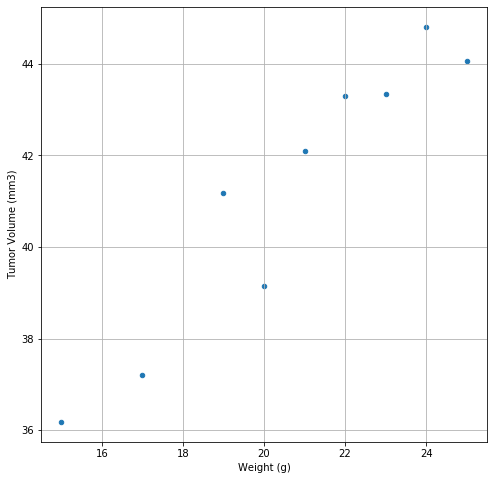

In [30]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capomulin_scatter = mouse_summary[mouse_summary["Drug Regimen"].isin(["Capomulin"])]

capomulin_scatter_df = best_regimen[["Mouse ID","Weight (g)", "Tumor Volume (mm3)"]]

capomulin_sorted = capomulin_scatter_df.sort_values(["Weight (g)"], ascending=True)

capomulin_scatter_plot = capomulin_scatter.reset_index()

capomulin_grouped_weight = capomulin_scatter_plot.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()

capo_grouped_plot = pd.DataFrame(capomulin_grouped_weight).reset_index()

#capomulin_scatter = capomulin_grouped_weight.plot.scatter(x='Weight (g)', y='Tumor Volume (mm3)')

capomulin_scatter = capo_grouped_plot.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True, figsize= (8,8))

#capomulin_scatter

## Correlation and Regression

In [31]:
# Calculating the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capo_grouped_plot['Weight (g)'],capo_grouped_plot['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")



The correlation between mouse weight and average tumor volume is 0.95


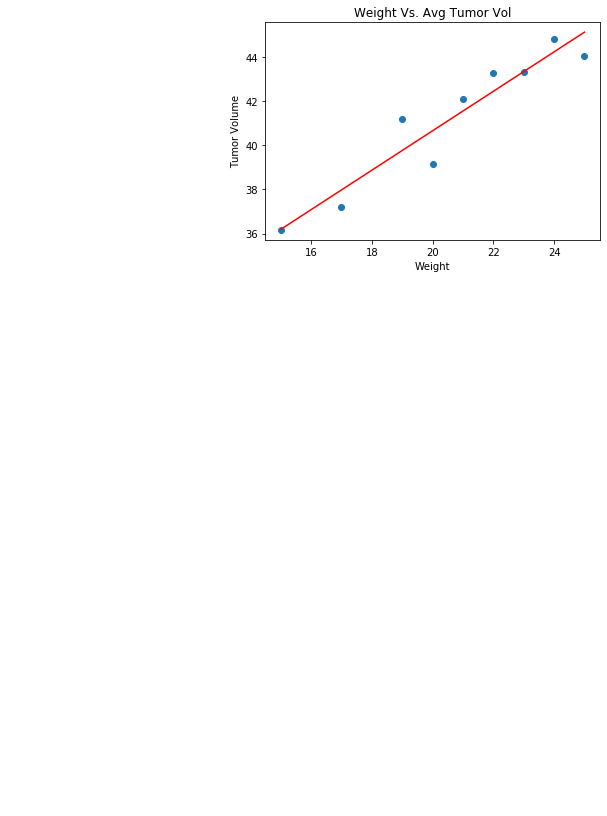

In [32]:
#Calculating linear regression model for mouse weight and average tumor volume for the Capomulin regimen

x_values = capo_grouped_plot["Weight (g)"]

y_values = capo_grouped_plot["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values)

plt.plot(x_values,regress_values,"r-")

plt.annotate(line_eq,(6,10),fontsize=10,color="red")

plt.xlabel("Weight")

plt.ylabel("Tumor Volume")

plt.title("Weight Vs. Avg Tumor Vol")

plt.show()